the equation to integrate

In [73]:
def f(x, y):
    return 1/(x+1) - 5/(y**2 + 1)

eulers method to bootstrap

In [74]:
def euler(x, y, dx):
    return y + dx * f(x, y)

given formula for cowells method

In [75]:
def cowell(x, y, dx, f_grid):
    return y + dx / 24 * (-f_grid[-2] + 13*f_grid[-1] + 13*f(x, y) - f(x+dx, euler(x, y, dx)))

initial condition and step

In [76]:
x, y = 1, 1

dx = 1e-2

initializing with euler

In [77]:
f_grid = []

for i in range(3):

    value = f(x+i*dx, euler(x, y, i*dx))
    
    f_grid.append(value)


performing cowells method

In [78]:
x_values, y_values = [x], [y]

for i in range(int(10//dx)):

    x += dx
    y = cowell(x, y, dx, f_grid)

    f_grid.append(f(x, y))
    f_grid.pop(0)

    x_values.append(x)
    y_values.append(y)

In [79]:
print(x_values, y_values)

[1, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.1300000000000001, 1.1400000000000001, 1.1500000000000001, 1.1600000000000001, 1.1700000000000002, 1.1800000000000002, 1.1900000000000002, 1.2000000000000002, 1.2100000000000002, 1.2200000000000002, 1.2300000000000002, 1.2400000000000002, 1.2500000000000002, 1.2600000000000002, 1.2700000000000002, 1.2800000000000002, 1.2900000000000003, 1.3000000000000003, 1.3100000000000003, 1.3200000000000003, 1.3300000000000003, 1.3400000000000003, 1.3500000000000003, 1.3600000000000003, 1.3700000000000003, 1.3800000000000003, 1.3900000000000003, 1.4000000000000004, 1.4100000000000004, 1.4200000000000004, 1.4300000000000004, 1.4400000000000004, 1.4500000000000004, 1.4600000000000004, 1.4700000000000004, 1.4800000000000004, 1.4900000000000004, 1.5000000000000004, 1.5100000000000005, 1.5200000000000005, 1.5300000000000005, 1.5400000000000005, 1.5500000000000005, 1.5600000000000005, 1.5700000000000005, 1.5800000000000005, 1.590

check using scipy

In [80]:
import numpy as np
from scipy.integrate import odeint

def wrapper(y, x):
    return f(x, y)

x, y = 1, 1


scipy_x_values = np.linspace(x, x + 999*dx, 1001)

scipy_y_values = odeint(wrapper, y, scipy_x_values).ravel()


<function matplotlib.pyplot.show(close=None, block=None)>

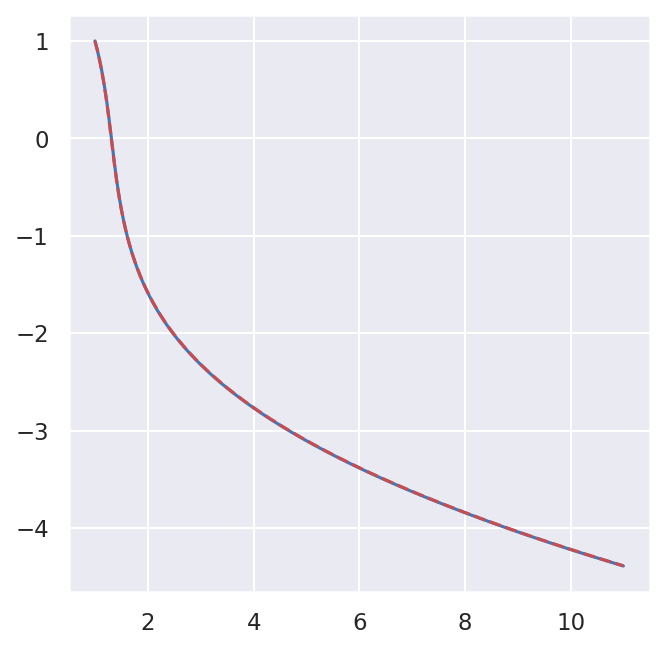

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5), dpi=150)
plt.plot(x_values,y_values, 'b-')
plt.show
plt.plot(scipy_x_values, scipy_y_values, 'r--')
plt.show